# Evaluación opciones usando Black-Sholes

Las hipótesis del modelo Black-Scholes son:

* No hay costes de transacción o impuestos.

* La tasa de interés libre de riesgo es constante para todos los vencimientos.

* La acción no paga dividendos.

* La volatilidad se mantiene constante.

* Se permite la venta en corto.

* No hay oportunidades de arbitraje sin riesgo.

* Asume que la distribución de probabilidad de los retornos es una distribución normal.

**INTUICIÓN EN RISK NEUTRAL WORLD** (el precio del subyacente crece a tasa constante r):

* Valor Futuro del activo:   ${S_{0}*e^{rT}}$

* Valor futuro de la opción: ${S_{0}*e^{rT}-k}$

* Valor presente de la opción: ${S_{0}-k*e^{-rT}}$


* $N(d_{2})$ = una medida estadística (distribución normal) correspondiente a la probabilidad de que la opción se ejerza al vencimiento

<center>
<img src="imgs/bsm.PNG"  alt="drawing" width="45%"/>
</center>

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Definimos las funciones

In [3]:
N = norm.cdf

def calc_d1 (S, K, T, r, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))

def calc_d2 (S, K, T, r, sigma):
    d1 = calc_d1 (S, K, T, r, sigma)
    return d1 - sigma * np.sqrt(T)


def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

Efecto de la variación del precio del subyacente

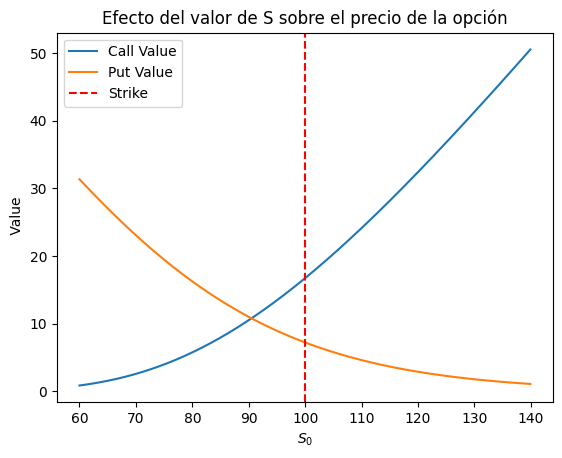

In [18]:
K = 100
r = 0.1
T = 1
sigma = 0.3

s_val = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in s_val]
puts = [BS_PUT(s, K, T, r, sigma) for s in s_val]
plt.plot(s_val, calls, label='Call Value')
plt.plot(s_val, puts, label='Put Value')
plt.axvline(x = K, color = 'r', label = 'Strike', linestyle = '--')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.title("Efecto del valor de S sobre el precio de la opción")
plt.legend()

Efecto de la variación del precio del subyacente en los valores de N(d1) y N(d2)

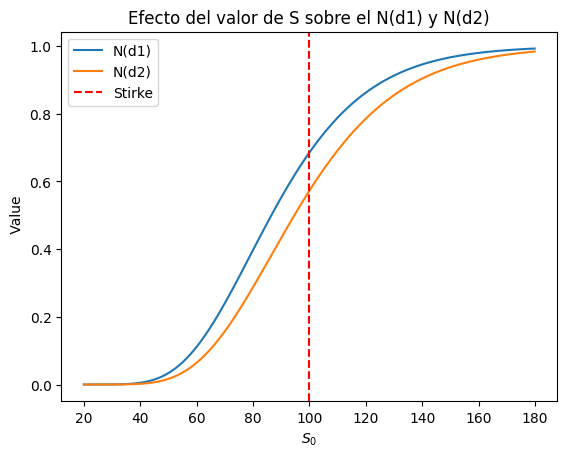

In [6]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(20,180,0.1)

d1 = [N(calc_d1 (s, K, T, r, sigma)) for s in S]
d2 = [N(calc_d2 (s, K, T, r, sigma)) for s in S]
plt.plot(S, d1, label='N(d1)')
plt.plot(S, d2, label='N(d2)')
plt.axvline(x = K, color = 'r', label = 'Strike', linestyle = '--')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.title("Efecto del valor de S sobre el N(d1) y N(d2)")
plt.legend()

Efecto de la variación de la volatilidad

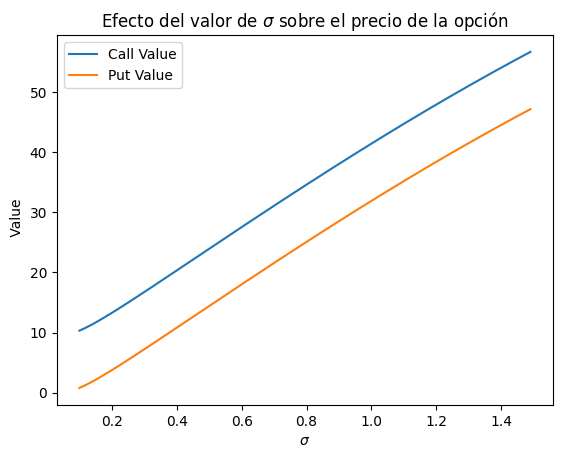

In [7]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.title("Efecto del valor de $\sigma$ sobre el precio de la opción")
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

Efecto del tiempo en los valores de las opciones

/tmp/ipykernel_6511/3333262390.py:12: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
/tmp/ipykernel_6511/3333262390.py:17: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


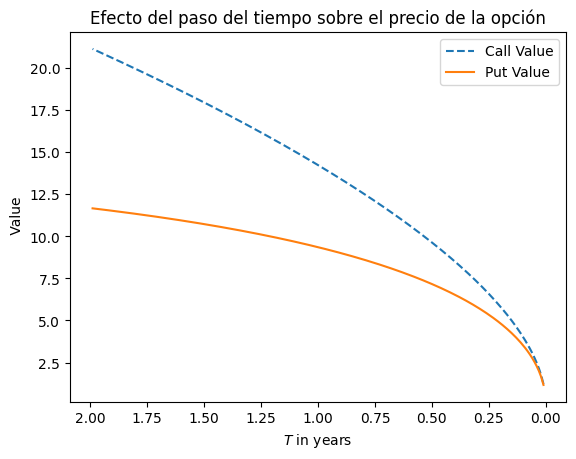

In [17]:
calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]

graph, plot1 = plt.subplots()
plot1.plot(T, calls, label='Call Value', linestyle = '--')
plot1.plot(T, puts, label='Put Value')
plot1.invert_xaxis()
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.title("Efecto del paso del tiempo sobre el precio de la opción")
plt.legend();
